# Defining the model

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [65]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        #how many layers?
        
        super().__init__()
        self.fullycon1= nn.Linear(in_features,h1)
        self.fullycon2= nn.Linear(h1,h2)
        self.out= nn.Linear(h2,out_features)
        #input( 4 feats)-> hidden1-> hidden2->output(3 classes)
        
    def forward(self,x):
        a1= f.relu(self.fullycon1(x))
        a2= f.relu(self.fullycon2(a1))
        res= self.out(a2)
        return res
        

In [66]:
torch.manual_seed(32)
model= Model()

# importing dataset and splitting


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df= pd.read_csv('C:/Users/maade/Desktop/Pytorch/PYTORCH_NOTEBOOKS/Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [69]:
X= df.drop('target',axis=1)
y= df['target']
# converting to numpy arrs
X=X.values
y=y.values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=33)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [72]:
#encoding for target not needed for crossentropy 
criterion= nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [73]:
model.parameters

<bound method Module.parameters of Model(
  (fullycon1): Linear(in_features=4, out_features=8, bias=True)
  (fullycon2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [74]:
#epochs
epochs=100
losses=[]
for i in range(epochs):
    
    #forward and get prediction
    y_pred=model.forward(X_train)
    
    #calculate loss/error
    loss= criterion(y_pred,y_train)
    losses.append(loss)
    
    #printing out for every 10 recs
    if i%10==0:
        print(f'Epoch {i} and loss is {loss}')
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 1.1507115364074707
Epoch 10 and loss is 0.9377316832542419
Epoch 20 and loss is 0.7798274159431458
Epoch 30 and loss is 0.6099672317504883
Epoch 40 and loss is 0.4008353650569916
Epoch 50 and loss is 0.25436991453170776
Epoch 60 and loss is 0.15052446722984314
Epoch 70 and loss is 0.10086154192686081
Epoch 80 and loss is 0.08127661049365997
Epoch 90 and loss is 0.07230935245752335


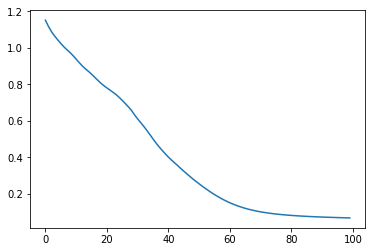

In [75]:
plt.plot(range(epochs),losses)

# Validate on test set

In [77]:
with torch.no_grad():
    y_eval= model.forward(X_test)
    loss = criterion(y_eval,y_test)
    print(loss)

tensor(0.0581)


In [81]:
correct=0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val= model.forward(data)
        
        print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]}')
        
        if(y_val.argmax().item()== y_test[i]):
            correct+=1
print(correct)

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
30


In [82]:
torch.save(model.state_dict(),'irismodel.pt')

In [84]:
new_model= Model()
new_model.load_state_dict(torch.load('irismodel.pt'))
new_model.eval()

Model(
  (fullycon1): Linear(in_features=4, out_features=8, bias=True)
  (fullycon2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# to use model on an entirely new data point

In [86]:
datapoint= torch.tensor([5.6,3.7,2.2,0.5])
with torch.no_grad():
    print(new_model(datapoint))
    print(new_model(datapoint).argmax())
    
    

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
